# BARRA-2 Hovmoller plot for Jan-Feb 2022 period

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
import sys
import metpy
import matplotlib
import matplotlib.gridspec as gridspec
import geopandas
import metpy.calc as mpcalc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from netCDF4 import Dataset
import netCDF4 as nc
import os
import glob
from datetime import datetime, timezone
import pytz

/jobfs/88702511.gadi-pbs/ipykernel_1462302/1462967197.py:10: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas


In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

# Create code to select BARRA wind regime days

In [3]:
#fp = "/g/data/v46/yvh565/barra2/yhuang//20220117T0600Z/av_lat_hflx-barra_r2-hres-202201170900-202201171500.nc"
#barra2ds = xr.open_dataset(fp, engine="netcdf4")
#barra2ds

In [3]:
fp = "/g/data/yb19/australian-climate-service/release/ACS-BARRA2/output/AUS-11/BOM/ECMWF-ERA5/historical/hres/BOM-BARRA-R2/v1/day/ua850/ua850_AUS-11_ECMWF-ERA5_historical_hres_BOM-BARRA-R2_v1_day_202201-202201.nc"

In [4]:
barra2_ds = xr.open_dataset(fp, engine="netcdf4")

# U wind levels

In [5]:
from zoneinfo import ZoneInfo 

In [30]:
# read all variable files for the two month period (all files in directory with av_wnd_ucmp)
mypath = "/g/data/v46/yvh565/barra2/yhuang/"
files = [os.path.join(root, f) for root, _, files in os.walk(mypath)
         for f in files
         if f.startswith('av_wnd_ucmp') and f.endswith('.nc')]
barra2_ds = xr.open_mfdataset(files, engine="netcdf4")
#barra2_ds["av_wnd_ucmp_uv"]

In [7]:
barra2_ds

<xarray.DataArray 'time' (time: 472)>
array(['2022-01-01T04:30:00.000000000', '2022-01-01T07:30:00.000000000',
       '2022-01-01T10:30:00.000000000', ..., '2022-02-28T19:30:00.000000000',
       '2022-02-28T22:30:00.000000000', '2022-03-01T01:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time                     (time) datetime64[ns] 2022-01-01T04:30:00 ... 20...
    forecast_reference_time  (time) datetime64[ns] 2022-01-01 ... 2022-02-28T...
    forecast_period          (time) timedelta64[ns] dask.array<chunksize=(2,), meta=np.ndarray>
Attributes:
    standard_name:  time
    axis:           T
    long_name:      time
    bounds:         time_bnds

In [81]:
date_string = barra2_ds["time"].values
#date_type = date_string.astype('datetime64[ns]').astype('O')
dates = date_string.astype(str).tolist()
print(type(dates[0]))
#barra2_ds["av_wnd_ucmp_uv"].sel(pressure=850,lat=-19.4192,
#                method="nearest").sel(lon=slice(142.9,150.1)).isel(time=slice(0,4))

date = nc.num2date(dates)
dt_obj = datetime.fromisoformat(dates)
# note that dt_obj is naive, i.e. it has no timezone info, so let's add it:
dt_obj = dates[0].replace(tzinfo=timezone.utc)
print(datetime.strftime(dt_obj, '%Y-%m-%dT%H:%M:%S %Z %z'))
# 2017-01-04T23:00:00 UTC +0000

# now let's shift time to another timezone:
new_timezone = ZoneInfo('AEST')
dt_obj = dt_obj.astimezone(new_timezone)
print(datetime.strftime(dt_obj, '%Y-%m-%dT%H:%M:%S %Z %z'))
# 2017-01-04T18:00:00 EST -0500

<class 'str'>


TypeError: num2date() takes at least 2 positional arguments (1 given)

In [86]:
barra2_ds["av_wnd_ucmp_uv"].sel(pressure=850,lat=-19.4192,
          method="nearest").sel(lon=slice(142.9,150.1)).isel(time=slice(0,4))

<xarray.DataArray 'av_wnd_ucmp_uv' (time: 4, longitude: 65)>
dask.array<getitem, shape=(4, 65), dtype=float64, chunksize=(2, 65), chunktype=numpy.ndarray>
Coordinates:
  * time                     (time) datetime64[ns] 2022-01-01T04:30:00 ... 20...
    pressure                 float64 850.0
    latitude                 float64 -19.42
  * longitude                (longitude) float64 143.0 143.1 ... 149.9 150.0
    forecast_reference_time  (time) datetime64[ns] 2022-01-01 ... 2022-01-01T...
    forecast_period          (time) timedelta64[ns] dask.array<chunksize=(2,), meta=np.ndarray>
Attributes: (12/15)
    standard_name:          x_wind
    units:                  m s-1
    STASH:                  [  1  30 201]
    cell_methods:           time: mean (interval: 1 hour)
    bom_name:               wnd_ucmp_uv
    coverage_content_type:  modelResult
    ...                     ...
    stash_description:      U COMPNT OF WIND ON P LEV/UV GRID
    cf_name:                x_wind
    cf_alias:               grid_eastward_wind
    land_sea:               both
    cf_description:         "x" indicates a vector component along the grid x...
    cmip_name:              ua

#### PLOT diurnal BARRA2 850hPa winds

In [ ]:
# create code to separate westerlies/easterlies/no wind days


In [ ]:
# create easterly and westerly data
Tjan = ds_W.rainrate.isel(y=150).sel(time=ds_W.time.dt.month.isin([1]))
Tjan_west = Tjan.sel(time=Tjan.time.dt.day.isin([1,2,3,4,5,6,7,8,9,13,14,15,16,17,18,19,23,24,25,26,27,28,31]))
Tjan_east = Tjan.sel(time=Tjan.time.dt.day.isin([10,11,12,20,21,22,29,30]))
Tfeb = ds_W.rainrate.isel(y=150).sel(time=ds_W.time.dt.month.isin([2]))
Tfeb_west = Tfeb.sel(time=Tfeb.time.dt.day.isin([1,2,3,4,9,10,11,12,23,24,25,26,27,28]))
Tfeb_east = Tfeb.sel(time=Tfeb.time.dt.day.isin([5,6,7,8,13,14,15,16,17,18,19,20,21,22,]))
# combine each month westerly and easterly data
Twest = xr.concat([Tjan_west,Tfeb_west],dim="time")
Teast = xr.concat([Tjan_east,Tfeb_east],dim="time")
# find mean rr by grouping
westerlies = Twest.groupby("time.hour").mean(dim=["time"],skipna=True)
easterlies = Teast.groupby("time.hour").mean(dim=["time"],skipna=True)

# Surface temperature

In [ ]:
mypath = "/g/data/v46/yvh565/barra2/yhuang/"
files = [os.path.join(root, f) for root, _, files in os.walk(mypath)
         for f in files
         if f.startswith('av_temp_scrn') and f.endswith('.nc')]
barra2_ds = xr.open_mfdataset(files, engine="netcdf4")

# Surface U wind

In [22]:
# surface u wind component plots
mypath = "/g/data/v46/yvh565/barra2/yhuang/"
files = [os.path.join(root, f) for root, _, files in os.walk(mypath)
         for f in files
         if f.startswith('av_uwnd10m_b') and f.endswith('.nc')]
barra2_ds = xr.open_mfdataset(files, engine="netcdf4")

# convert UTC to local time (Australia/Brisbane timezone)

In [116]:
# convert datetime objects to string objects
time = barra2_ds.time.values.astype('datetime64[ns]')
times = np.datetime_as_string(time, unit='s')

In [98]:
# function to convert datetime string from timezone1 to timezone2
def convert_datetime_timezone(dt, tz1, tz2):
    tz1 = pytz.timezone(tz1)
    tz2 = pytz.timezone(tz2)
    dt = datetime.datetime.strptime(dt,"%Y-%m-%dT%H:%M:%S")
    dt = tz1.localize(dt)
    dt = dt.astimezone(tz2)
    dt = dt.strftime("%Y-%m-%dT%H:%M:%S")
    return dt

In [99]:
# convert all times to AEDT times
times_AEDT = []
for i in times:
    result = convert_datetime_timezone(i,"UTC","Australia/Brisbane")
    times_AEDT.append(result)

In [132]:
# convert local time string objects to local time datetime objects
AEDT = pd.to_datetime(times_AEDT, format="%Y-%m-%dT%H:%M:%S")
for i in time:
    time[i] = AEDT

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [129]:
time

array(['2022-01-01T13:30:00.000000000', '2022-03-01T12:30:00.000000000',
       '2022-03-01T12:30:00.000000000', ...,
       '2022-03-01T12:30:00.000000000', '2022-03-01T12:30:00.000000000',
       '2022-03-01T12:30:00.000000000'], dtype='datetime64[ns]')

In [109]:
type(barra2_ds.time)

# new dataset with updated time
new_barra2_ds = xr.DataArray(mean_elev, coords={'lat': lat, 'lon': long, 
                                'elevation_band': elevation_band},
             dims=['elevation_band', 'lat', 'lon'])

ds['mean_elev'] = me

xarray.core.dataarray.DataArray

# Hovmoller function

In [9]:
# define function to plot
tv_barra2_202112u1 = barra2_202112.ua850.sel(lat=-19.4198,method="nearest").isel(time=np.logical_and(barra2_202112.time.dt.day==25,barra2_202112.time.dt.hour.isin([13,14,15,16,17,18,19,20,21,22,23])))
tv_barra2_202112u2 = barra2_202112.ua850.sel(lat=-19.4198,method="nearest").isel(time=np.logical_and(barra2_202112.time.dt.day==26,barra2_202112.time.dt.hour.isin([0,1,2,3,4,5,6,7,8,9,10,11,12])))                                                                                                                   
tv_barra2_202112 = xr.concat([tv_barra2_202112u1,tv_barra2_202112u2],dim="time")


def plot_hovmoller(start,end,lon_sliceT,lon_sliceC,lon_sliceW,variable,suptitle,level_data,cmap,
                   cbar_units,nbins,anomaly=None,temp=None,surface=None,contour_line_labels=None):  
    # create time slices between 25th and 28th
    start_time = start #'2022-01-25T00:00:00.000000000'
    end_time = end #'2022-01-31T00:00:00.000000000'
    time_slice = slice(start_time, end_time)
    # lat T = -19.47
    lat_C = -16.830002 # -16.817
    lat_W = -16.279999 # -16.2874
    lon_slice_T = lon_sliceT #slice(142, 150)                  
    lon_slice_C = lon_sliceC #slice(142,149)
    lon_slice_W = lon_sliceW #slice(147,153)

    # Get data, selecting time, lat/lon slice
    if anomaly==True:
        variable_data_T = tv_barra2_202112
     #   variable_data_T = barra2_ds[variable].sel(lat=-19.4198,method="nearest").sel(lon=lon_slice_T,time=time_slice
     #                   ).groupby("time.day") - barra2_ds[variable].isel(lat=362).sel(lon=lon_slice_T,
     #                   time=time_slice).groupby("time.day").mean()

        variable_data_C = barra2_ds[variable].sel(lat=-16.873,method="nearest").sel(lon=lon_slice_C,time=time_slice
                        ).groupby("time.day") - barra2_ds[variable].isel(lat=386).sel(lon=lon_slice_C,
                        time=time_slice).groupby("time.day").mean()

        variable_data_W = barra2_ds[variable].sel(lat=-16.2874,method="nearest").sel(lon=lon_slice_W,time=time_slice
                        ).groupby("time.day") - barra2_ds[variable].isel(lat=390).sel(lon=lon_slice_W,
                        time=time_slice).groupby("time.day").mean()
        
    else:
        if temp==True:
            variable_data_T = barra2_ds[variable].isel(lat=362).sel(lon=lon_slice_T,time=time_slice) - 273.15
            variable_data_C = barra2_ds[variable].isel(lat=386).sel(lon=lon_slice_C,time=time_slice) - 273.15
            variable_data_W = barra2_ds[variable].isel(lat=390).sel(lon=lon_slice_W,time=time_slice) - 273.15
        else:
            if surface==True:
                variable_data_T = barra2_ds[variable].isel(lat=362).sel(lon=lon_slice_T,time=time_slice)
                variable_data_C = barra2_ds[variable].isel(lat=386).sel(lon=lon_slice_C,time=time_slice)
                variable_data_W = barra2_ds[variable].isel(lat=390).sel(lon=lon_slice_W,time=time_slice)
            else:
                variable_data_T = barra2_ds[variable].isel(lat=362).sel(lon=lon_slice_T,time=time_slice)#,pressure=850) 
                variable_data_C = barra2_ds[variable].isel(lat=386).sel(lon=lon_slice_C,time=time_slice)#,pressure=850) 
                variable_data_W = barra2_ds[variable].isel(lat=390).sel(lon=lon_slice_W,time=time_slice)#,pressure=850) 

    # Get times and make array of datetime objects
    variable_times_T = variable_data_T.time.values.astype('datetime64[ns]').astype('O')
    variable_times_C = variable_data_C.time.values.astype('datetime64[ns]').astype('O')
    variable_times_W = variable_data_W.time.values.astype('datetime64[ns]').astype('O')
    
    # use local time dates
 #   variable_times_T = AEDT.values.astype('datetime64[ns]').astype('O')
 #   variable_times_C = AEDT.values.astype('datetime64[ns]').astype('O')
 #   variable_times_W = AEDT.values.astype('datetime64[ns]').astype('O')

    # Specify lon values for chosen domain
    lons_T = variable_data_T.lon.values
    lons_C = variable_data_C.lon.values
    lons_W = variable_data_W.lon.values 
    
    # make plot
    fig, ax = plt.subplots(1,3,figsize=(18,10),gridspec_kw={'width_ratios': [5, 5, 6]})
    fig.patch.set_facecolor('white')

    # Set some titles
    ax[0].set_title('Townsville (lat=-19.4)', loc='left', fontsize=20,fontweight=0.9)
    ax[1].set_title('Cairns (lat=-16.82)', loc='left', fontsize=20,fontweight=0.9)
    ax[2].set_title('Willis Island (lat=-16.29)', loc='left', fontsize=20,fontweight=0.9)
    fig.figure.suptitle(suptitle,fontsize=30) #,x=0.2,y=0.98,
   # ax[0].grid(True,which="minor")

    # Plot of chosen variable averaged over lat and slightly smoothed
    levels = level_data
    cf_T = ax[0].contourf(lons_T, variable_times_T, variable_data_T, levels=levels, cmap=cmap, extend='both')
    cf_C = ax[1].contourf(lons_C, variable_times_C, variable_data_C, levels=levels, cmap=cmap, extend='both')
    cf_W = ax[2].contourf(lons_W, variable_times_W, variable_data_W, levels=levels, cmap=cmap, extend='both')

    line_colors = ['black' for l in cf_T.levels]
    cs_T = ax[0].contour(lons_T, variable_times_T, variable_data_T, alpha=0.5,colors=line_colors, linewidths=0.8,linestyles='-')
    cs_C = ax[1].contour(lons_C, variable_times_C, variable_data_C, alpha=0.5,colors=line_colors, linewidths=0.8,linestyles='-')
    cs_W = ax[2].contour(lons_W, variable_times_W, variable_data_W, alpha=0.5,colors=line_colors, linewidths=0.8,linestyles='-')                 
     
    # plot contour line labels
    if contour_line_labels==True:
        plt.clabel(cs_T, fontsize=10, inline=1,fmt = '%1.0f')
        plt.clabel(cs_C, fontsize=10, inline=1,fmt = '%1.0f')
        plt.clabel(cs_W, fontsize=10, inline=1,fmt = '%1.0f')
        
    # cbar and cbar label                
    cbar_W = plt.colorbar(cf_T, ax=ax[2],orientation='vertical', pad=0.04, aspect=30, extendrect=True,
                         ticks=level_data)
    cbar_W.set_label(cbar_units,fontsize=15)
    
    # plot vertical lines to represent coastlines
    ax[0].axvline(147.5,color='blue',alpha=0.2,linestyle='--')
    ax[1].axvline(145.75,color='blue',alpha=0.2,linestyle='--')
    
    # plot locations of radars
    ax[0].axvline(146.5509,color='k',alpha=0.5,linestyle='-.')
    ax[1].axvline(145.683,color='k',alpha=0.5,linestyle='-.')
    ax[2].axvline(149.9646,color='k',alpha=0.5,linestyle='-.')
    
    # Make some ticks and tick labels
    xticks_T = np.arange(143,151,1)
    xticks_C = np.arange(143,150,1)
    xticks_W = np.arange(147,154,1)            
    ax[0].set_xticks(xticks_T)
    ax[1].set_xticks(xticks_C)
    ax[2].set_xticks(xticks_W)
                    
    x_tick_labels_T = ["143","144","145","146","147","148","149","150"]
    x_tick_labels_C = ["143","144","145","146","147","148","149"]
    x_tick_labels_W = ["147","148","149","150","151","152","153"]        
    ax[0].set_xticklabels(x_tick_labels_T)
    ax[1].set_xticklabels(x_tick_labels_C)
    ax[2].set_xticklabels(x_tick_labels_W)
    
    ax[0].grid(visible=None, which='major', axis='y',alpha=0.5)
    ax[1].grid(visible=None, which='major', axis='y',alpha=0.5)
    ax[2].grid(visible=None, which='major', axis='y',alpha=0.5)

    ax[0].set_yticks(variable_times_T)
    ax[1].set_yticks(variable_times_T)
    ax[2].set_yticks(variable_times_T)
    ax[1].locator_params(axis='y', nbins=nbins)
    ax[2].locator_params(axis='y', nbins=nbins)
    ax[0].set_yticklabels(variable_data_T.time.values.astype('datetime64[s]'))
    ax[0].locator_params(axis='y', nbins=nbins)
    ax[1].set(yticklabels=[]) 
    ax[2].set(yticklabels=[])  
                    
    ax[0].set_xlabel("lon",fontsize=15)
    ax[1].set_xlabel("lon",fontsize=15)
    ax[2].set_xlabel("lon",fontsize=15)
    ax[0].set_ylabel("UTC",fontsize=20)            
                    
    fig.tight_layout()
    plt.show()
    return

TypeError: Input z must be at least a (2, 2) shaped array, but has shape (1, 64)

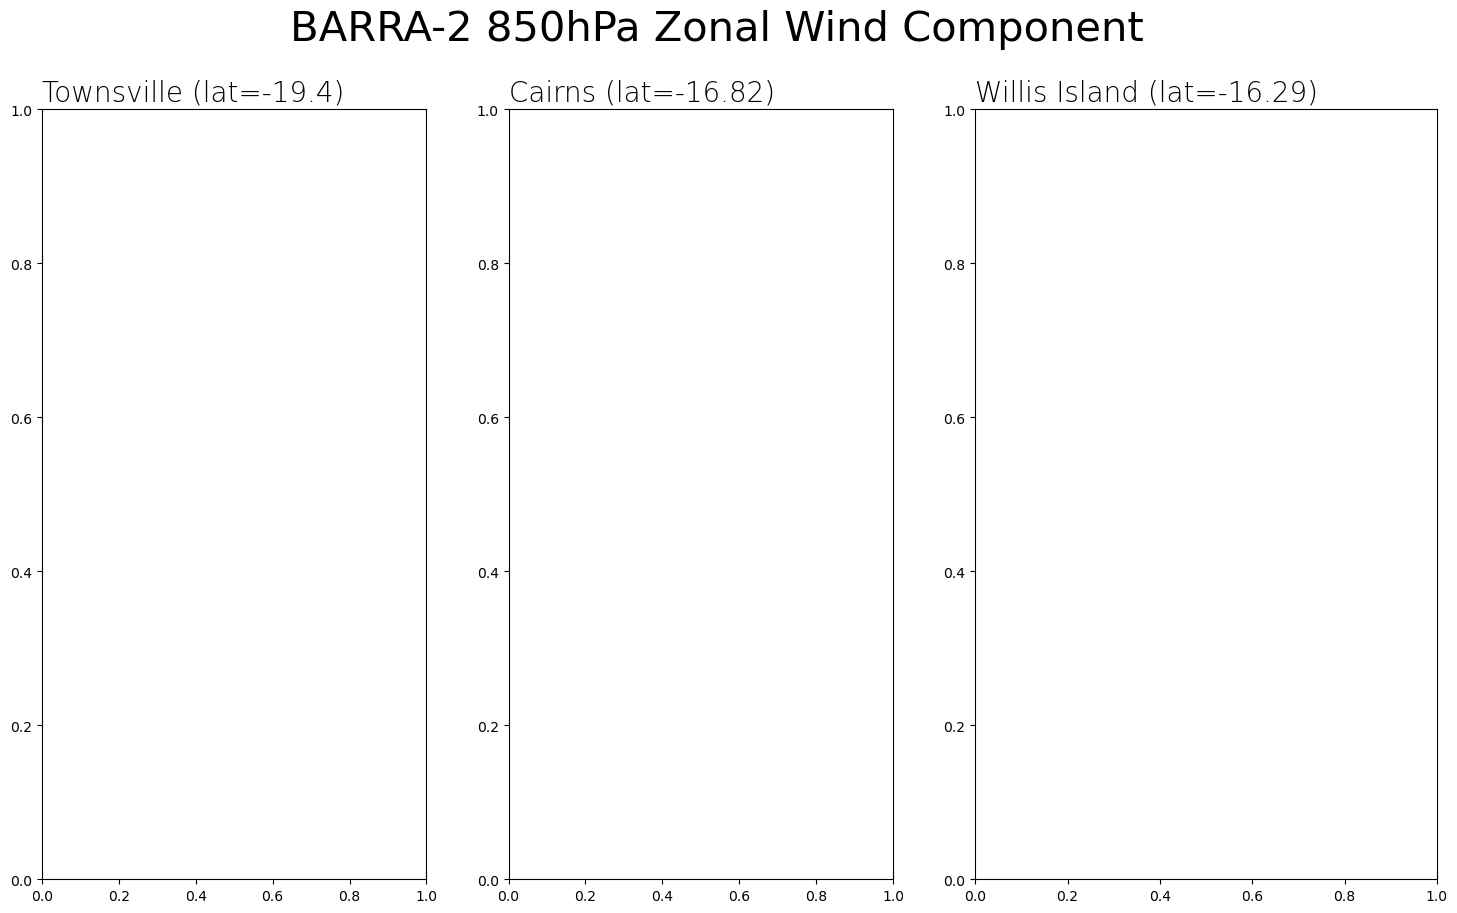

In [10]:
plot_hovmoller('2022-01-22T13:00:00.000000000','2022-01-23T12:55:00.000000000',slice(143,150),
               slice(143,149),slice(147,153),"ua850","BARRA-2 850hPa Zonal Wind Component",
               [-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12],"coolwarm","m/s",7,
               anomaly=False,temp=False,surface=False,contour_line_labels=True)
#av_uwnd10m_b
#av_wnd_ucmp_uv

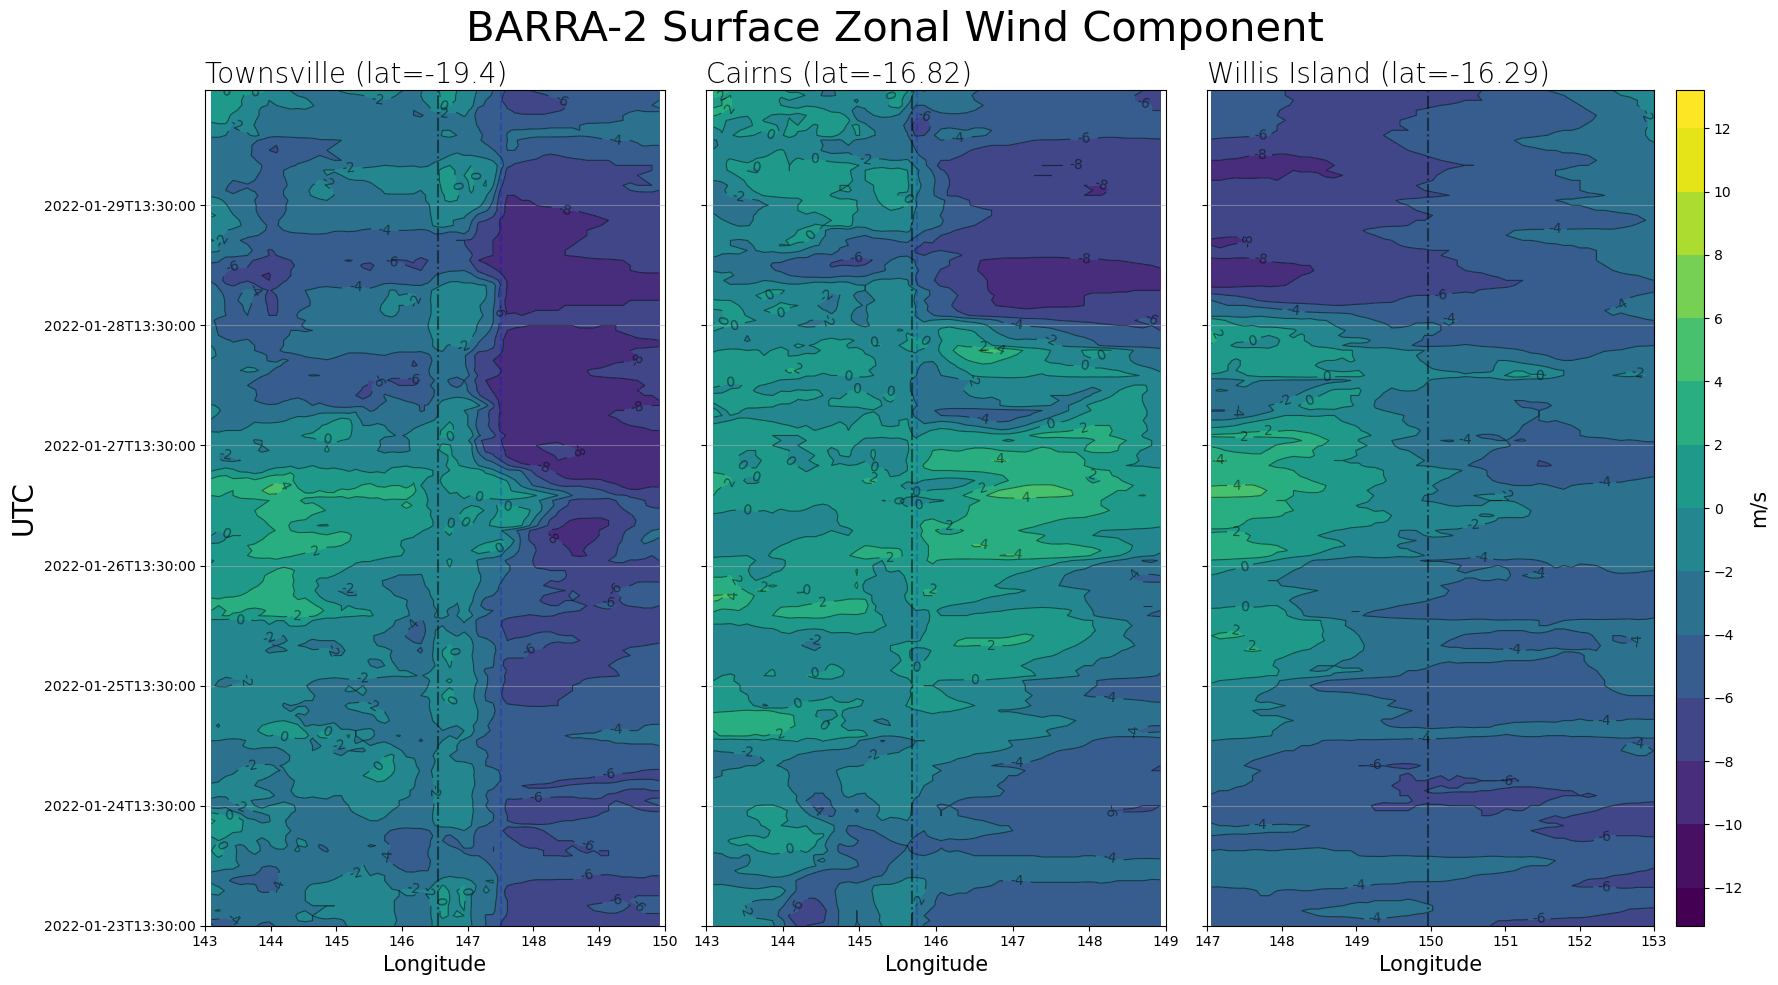

In [26]:
plot_hovmoller('2022-01-23T13:00:00.000000000','2022-01-30T12:55:00.000000000',slice(143,150),
               slice(143,149),slice(147,153),"av_uwnd10m_b","BARRA-2 Surface Zonal Wind Component",
               [-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12],"viridis","m/s",7,
               anomaly=False,temp=False,surface=True,contour_line_labels=True)
#av_uwnd10m_b
#av_wnd_ucmp_uv

In [ ]:
plot_hovmoller("av_wnd_ucmp_uv","BARRA2 850hPa U Wind Component",
               [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10],"viridis",
               "m/s",anomaly=False,temp=False,surface=False,contour_line_labels=True)

In [ ]:
# start_time = '2022-02-08T00:00:00.000000000'
end_time = '2022-02-21T00:00:00.000000000'
time_slice = slice(start_time, end_time)
lon_slice_T = slice(142, 150)                  
variable_data_T = barra2_ds["av_wnd_ucmp_uv"].isel(lat=362).sel(lon=lon_slice_T,time=time_slice)
variable_data_T.time.values.astype('datetime64[ns]')

In [ ]:
plot_hovmoller("av_uwnd10m_b","BARRA2 Surface U Wind Component Anomaly Feb 2022",
               [-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6],"viridis",
               "m/s",anomaly=True,temp=False,surface=True,contour_line_labels=True)

In [ ]:
plot_hovmoller("av_temp_scrn","BARRA2 Av. Surface Temp",
               [15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35],"Reds","K",anomaly=False,temp=True)